# Einführung Statistik

Wir werden heuten ein paar wenige Grundlagen zur Statistik anschauen.
Die Statistik woll uns helfen Daten einfach zu beschrieben und erklären. 

In [171]:
import numpy as np
%matplotlib inline
np.set_printoptions(suppress=True)

Wir können uns zum Beispiel die Abi Noten einer bestimmten Klasse anschauen:

In [1]:
abi_klasse = [1.64, 2.35, 1.88, 2.48, 2.16, 3.92, 2.16, 2.  , 1.76, 2.82, 1.81,
       2.59, 3.03, 1.7 , 2.87, 3.21, 2.65, 1.97, 1.2, 1.67, 1.77, 1.98,
       3.4 , 1.31, 1.72, 2.05, 1.12 , 1.56, 2.01, 2.1 ]

Allerdings ist es sehr schwer nur über die Daten eine Übersicht zubekommen.
Einfach ist es sich die Noten aufzuzeichnen.
<img src='Img/intro_stats/noten_1.png'></img>

Obwohl Sie jetzt eine bessere gesamt Übersicht haben, könnte es ihnen schwer fallen zwei Klassen miteinander zu vergleichen.
<img src='Img/intro_stats/noten_2.png'></img>

Oft reicht eine rein visuelle Inspektion nicht um eindeutige Entscheidungen zu treffen.
Hierfür werden Metriken benögt, die die Verteilung von Datenpunkten, wie die Abinoten, beschreiben.

Am wohlbekanntesten ist der Mittelwert, genauer gesagt das arithmetisches Mittel. Es beschreibt den Durchschnitt einer Verteilung von Datenpunkten. 
Und das arithmetische Mittel zu berechnen wird die Summe aller Werte durch die Anzahl der Werte geteilt.


$$\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i$$

Der mittelwert wird oft durch $\bar{x}$ beschrieben.
Berechnen Sie das arithmetische Mittel in Python für die Abiklasse aus. *Ohne dabei Numpy zu benutzen*

In [10]:
mean_abiklasse = _____________# Formel für den Mittelwert

SyntaxError: invalid syntax (2486535905.py, line 1)

<details>
<summary><b>Lösung:</b></summary>
    
```python 
mean_abiklasse = sum(abi_klasse)/len(abi_klasse)
```
</details>

Doch der Mittelwert reicht nicht um eine Verteilung von Werten adequate zu beschrieben. Zum Beispiel, haben die beiden [Normal Verteilungen](https://de.statista.com/statistik/lexikon/definition/95/normalverteilung/) im Beispiel den gleichen Mittelwert und trotzdem sind Sie nicht identisch Verteilt. 
<img src='Img/intro_stats/noten_3.png'></img>

Wir können sehen, dass die orangene Verteilung viel schmaller ist als die blaue. Das heißt die Werte der orangenen Gruppe liegen näher an ihrem Durchschnitt als bei der blauen Gruppe.
Die breite einer Verteilung wird durch die Varianz gemessen. Die Varianz misst den durchschnittlichen Abstand der Werte zu ihrem Mittelwert. 

Die Varianze ($s^2$) wird wie folgt berechnet:

$$s^2 = \frac{1}{n}\sum_{i=1}^n(x_i-\bar{x})^2$$

Beachtet das nicht die Different ($x_i-\bar{x}$) sondern das Quadrat ($x_i -\bar{x})^2$ der Differnenz summiert wird. Somit haben größere Abstände einen größeren Einfluß auf die Varianz. 

Berechnet die Varianz der `abi_klasse`:


In [17]:
varianz_abiklasse = ________________ /(len(abi_klasse)# Ihr braucht wahrscheinlich einen for-loop

0.42147433333333323

<details>
<summary><b>Lösung:</b></summary>
    
```python
sum([(x - mean_abiklasse)**2 for x in abi_klasse])/(len(abi_klasse))
```
</details>    


<details>
    <summary><b>Lösung: for-loop ausgeschrieben</b></summary>
```python
quadrate = 0
for x in abi_klasse:
    quadrate = quadrate +((x-mean_abiklasse)**2)
varianz_abiklasse = quadrate/len(abi_klasse) 
```
</details>   

Oft wird auch die Standard Abweichung als Maß für die *Breite* eine Verteilung benutzt. Die Standard Abweichung erhält man durch das nehmen der Wurzel der Varianz. Damit wird das Maß der Varianz auf die Skala der ursprünglichen Verteilung gebracht.

In [ ]:
std_abiklasse = __________ #Berechnen Sie die Standardabweichung

<details>
<summary><b>Lösung:</b></summary>
    
```python
std_abiklasse= varianz_abiklasse**(0.5)
```
</details>    

Natürlich gibt es alle Funktionen auch schon in numpy: `np.mean()`,`np.std()`,`np.var()`

In [27]:
import numpy as np
print("Mittelwert: ", np.mean(abi_klasse))
print("Varianz: ", np.var(abi_klasse))
print("Standard Abweichung: ", np.std(abi_klasse))


Mittelwert:  2.1629999999999994
Varianz:  0.4214743333333333
Standard Abweichung:  0.6492105462277499


Mit dem Maß der Varianz/Standard und dem Mittelwert können wir schon einige Verteilung beschreiben. Natürlich nicht alle, z.B. z.B. bei multimodalen Verteilungen bräuchte man noch mehr Informationen. 

<img src='Img/intro_stats/noten_4.png'></img>


Allerdings wollen wir nicht immer nur Daten beschreiben sondern wir wollen auch Informationen von diesen Daten gewinnen. 
Mit hilfe der Korrelation können wir zum Beispiel den Zusammenhang von Körergröße zu Gewicht beschrieben. Je größere ein Mensch ist desto schwerer ist er. Dieses Model ist natürlich nicht perfekt, das Körpergewicht ist ntürlich nicht vur von der Körpergröße abhängig. Es gibt große leichte Menschen und kleine schwerere. Aber es gibt eine zu Grunde liegende Tendenz. 

<table><tr>
<td> <img src='Img/intro_stats/gewichtvsgröße.png' alt="Drawing" style="width: 250px;"/> </td>
<td> <img src='Img/intro_stats/gewichtvsgröße2.png' alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

Wir können die Beziehung mit einer linearen Regression beschreiben.
Sie kennen vielleicht noch aus der Schule die geraden Glecihung $y = mx+t$ (oder $y = ax+b$). 
<br>



- $x$ ist die Input Variable, in unserem Falle die Körpergröße
- $y$ ist die zu vorher sagende Variable (Körpergewicht)
- $m$ beschreibt die Steigung der Geraden
- $t$ gibt den y-Achsen Abschnitt an, der Wert von $y$ wenn $x=0$

<img src='Img/intro_stats/reg1.png' alt="Drawing" width="500"/>

Angenommen die Gleichung der Regressiongeraden wäre $y=0.3x+21$ dann wäre zum Beispield as Gewicht einer Person mit einer Größe von 180cm, 75kg ($0.3\cdot180+21)$.

Natürlich wiegt nicht jede 180cm große Person 66 kg. Das ist nur der vorhergesagte Wert unsere Regressionsgleichung. Um das eindeutig zu kennzeichnen, schreiben wir $\hat{y}$ anstatt $y$.
Dadurch wird die Geradegleichung zu $hat{y}=mx+t$. 

---

Schreiben Sie eine Funktion, die das Gewicht an Hand der oben beschriebenen Geradengleichung berechnet.


In [264]:
def reg(x,m,t):
    _________# Was soll diese Funktion ausgeben?

<details>
<summary><b>Lösung:</b></summary>
    
```python
def reg(größe):
    return m*x+t
```
</details>    


Die Variable `x` enthält die Größen in cm von 5 Personen. Für diese fünf Personen brechnen Sie das Gewicht mit Hilfe der Funktion `gewicht_reg`. 

In [ ]:
x = [182,167,198,132,178]
y_hat = [reg(__,__,__) for ___ in _____ ]
y_hat

<details>
<summary><b>Lösung:</b></summary>
    
```python
y_hat = [gewicht_reg(gewicht) for gewicht in x ]
```
</details>    

Die Werte sind natürlich nur eine Schätzung des Gewichtes, und weichen von dem tatsächlichen Gewicht der Person ab. Um zu beurteilen wie gut unsere Model das Gewicht bestimmen kann, brauchen wir auch das tatsächliche gemessene Gewicht der Personen. Diese sind in `y` gegeben. Wir können zum Beispiel die Differenz von `y_hat` und `y` berechnen. Dafür müssenw ir aber erst einmal die Listen zu `numpy` arrays konvertieren

In [52]:
y = np.array([78.2,68.3, 81.0,64.3, 70.1 ])
y_hat = np.array(y_hat)
residual = y - y_hat # was ziehen wir von y ab?
residual

NameError: name '____' is not defined

Diese Differenz zwischen dem tatsächlichen und dem vorhergesagten Wert($y - \hat{y}$) wird auch als Residuum bezeichnet. Als Symbol für das Residuum wird meisten das kleine Epsilion ($\epsilon$) verwendet, hiermit wird die Größe des Fehlers (**E**rror) der Vorhersage gemessen. 

<img src='Img/intro_stats/reg_2.png' alt="Drawing" width="500"/>

Um Einschätzen zu können wie gut unsere Model insgesamt ist können wir zum Beispiel die Residuen einfach summieren.

In [58]:
sum(residual)

-0.20000000000000995

Wie Sie sehen ist der Wert sehr nahe bei Null. Eigentlich ein sehr gerinnger Fehler. Das Problem ist aber, dass Residuen sowohl positve als auch negativ sein können. Das heißt beim summieren gleichen Sie sich aus, und man wird immer Werte in der Nähe von Null erhalten. Um das zu umgehen summieren deswegen nicht die Residuen sonder, wie bei der Varianz, die Quadrate der Residuen. $\sum_{i=1}^{n}(y_i-\hat{y}_i)^2$. 

Die Summe alleine, würde aber dazu führen das Modelle die mehr Datenpunkte haben, also ein größeres $n$, automatische größere Summen haben werden. Deswegen nehmen wir nicht die Summe sondern den Mittelwert der Quadrate: $\frac{1}{n}\sum_{i=1}^{n}(y_-\hat{y}_i)^2$. Dieser Wert, *Mean Squared Error* (MSE) genannt, eignet sich um die Güte der vorhersagen zu beurteieln. Wenn ein Model ein kleinen MSE hat, können Sie daraus schlussfolgern, dass die Residuen klein sein müssen also die Unterschiede zwischen vorhergesagten um wahren Wert klein sind. 

So wie bei der varianz und Standard Abweichung gibt es auch den Root Mean Squared Error (RMSE). Wie Sie sich denken können, wird einfach die Wurzel vom MSE genommen. Schreiben Sie eine Funktion, die den RMSE berechnen kann. Sie dürfen `numpy` benutzen, das heißt Sie brauchen keinen for-loop.


In [62]:
def RMSE(y,y_hat):
   MSE = np.sum(__________________) /len(_____) #Hier wird der MSE berechnet, 
   return ___________ # Wir wollen nicht den MSE sonder den RMSE. Konvertieren Sie den MSE zum RMSE
RMSE(y, y_hat)    

NameError: name '__________________' is not defined

<details>
<summary><b>Lösung:</b></summary>
    
```python
def RMSE(y,y_hat):
   MSE = np.sum((y-y_hat)**2)/len(y)
   return np.sqrt(MSE) 
```
</details>    

In [274]:
def RMSE(y,y_hat):
   MSE = np.sum((y-y_hat)**2)/len(y)
   return np.sqrt(MSE) 

Im machinellen Lernen, oder allgemeine im Feld der Optimizierung, werden Funktionen wie den RMSE auch als Loss Funktion bezeichnet. Sie messen wie gut ein Model, dessen Parameter, zu den Daten passen. Den Loss, berechnet durch die Loss Funktion, gilt es zu minimieren. 

# Beispiel

Bis jetzt haben Sie immer die Parameter `m` und `t` vorgegeben bekommen. In der Realität müssen Sie diese selber berechnen (lassen). Im folgenden Beispiel werden wir uns mit der Vorhersage von Siedepunkt befassen. Dafür benutzen wir einen Datensatz des amerikanischen *National Institute of Standards and Technology*. Im Datensatz sind die Siedetemperaturen für 72 einfache Alkohole aufgezeichnet. Dazu wrd noch das molekolare Gewicht und die Anzahl der Kohlenstoffe angegeben. 
Der Datensatz befindet sich im Ordner `../data/boilingpoints/`

Wir benutzen diesmal `numpy` um unseren Datensatz einzulesen. 

In [302]:
data = np.genfromtxt('../data/boilingpoints/bp.csv', delimiter=',', skip_header =True)
print("Größe der Daten: ",data.shape)
data[:10,:] 

Größe der Daten:  (72, 3)


array([[338.  ,  32.04,   1.  ],
       [351.  ,  46.07,   2.  ],
       [371.  ,  60.1 ,   3.  ],
       [356.  ,  60.1 ,   3.  ],
       [391.  ,  74.12,   4.  ],
       [372.  ,  74.12,   4.  ],
       [381.  ,  74.12,   4.  ],
       [355.  ,  74.12,   4.  ],
       [411.  ,  88.15,   5.  ],
       [404.  ,  88.15,   5.  ]])

Der Datensatz besteht aus 72 Reihen und 7 Spalten. Jede Reihe representiert einen Alkohol und die 7 Spalten sind 7 Deskriptoren. Die erste Spalte enthält die Schmelzpunkte, die zweite das molekulare Gewicht und die dritte Spalte die Anzahl der Kohlenstoffe. 

Unsere Ziel ist es mit Hilfe des molekularen Gewichtes den Schmelzpunkt vorher zusagen.
zunächst speichern wir die erste Spalte(Schmelzpunkte) in die Variable `y` und die die zweite Spalte in die Variable `x`

In [ ]:
y = data[:,0] # y ist unsere zuvorhersagende Variable (schmelzpunkte)
x = data[:,1:2] # Wir könnten auch data[:,1] benutzen, verhält sich leicht anders.

In [307]:
print(data[:5,1])
print(data[:5,1:2])

[32.04 46.07 60.1  60.1  74.12]
[[32.04]
 [46.07]
 [60.1 ]
 [60.1 ]
 [74.12]]


Sie können sehen, dass wir die selben Werte auswählen, allerdings reduzieren wir die Spalte in der ersten Variante zu einem 1-dimensionales Array der Größe `(72)`. Also einem Vektor der Länge 72. Mancher der Funktionen notwenig für eine lineare Regression erwarten, dass sich unsere `x` Variable in Form eines 2-dimensionalen Array befindet. Deswegen wählen wir die Spalte mit `data[:,1:2]` aus.


Sie können die Daten auch graphisch darstellen, dafür benutzen wir die Libary `matplotlib`. Mit der `plt.plot()` Funktion können Sie schnell einfache Graphen erstellen. Hierbei müssen Sie nur angeben welche Werte auf die x-Achse angeben (erste Position in der Funktion), dann geben Sie an was auf die y-Achse gehört (zweite Position). Als letztes können Sie spezifizieren ob die einzelnen Werte als Punkt `"o"` oder mit einer Linie verbunden werden soll `"-"`.

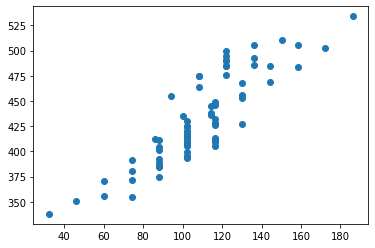

In [310]:
from matplotlib import pyplot as plt
plt.plot(x, y, "o")

Wir können klar sehen, dass mit steigendem Gewicht auch der Siedepunkt der Alkohole steigt. 

In [253]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y) # berechnet die Regressions Gerade
m = model.coef_ # Wir können m und t aus model() erhalten.
t = model.intercept_

In [285]:
y_hat = reg(data[:,1],m,t)
y_hat

RMSE(y, y_hat) 

21.999551972730536

In [293]:
y_hat = reg(data[:,1],1.9,208)

RMSE(y, y_hat) 



30.141295332704825

# Logistische Regression

Es gibt auch Probleme in dene nicht exakte Werte vorhergesagt werden sollen. Wir wollen zum Beispiel entscheiden, ob ein Patient auf die Intensivstation muss oder nicht. Hierbei muss nur zwischen `JA` oder `NEIN` entschieden werden. In mathematischen Termen würden wir aber von `1` oder `0` sprechen. Wir sprechen von eine binären Klassifizierung, wenn ein Datenpunkt zu einer von zwei Gruppen gehören kann. 

Hier haben wir ein Beispiel von einem Basketballspieler der auf den Korb aus verschiedenen Distanzen wirft. 
Macht er einen Korb wird dieser Wurf mit einer `1` gekennzeichnet. Trifft er nicht wird diesem Wurf eine `0` zugeordnet.


In [152]:
körbe = np.array([1,1,1,1,1,1,0,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0])    
distanz = np.array([0.,1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,11.,12.,13.,14.,
                    15.,16.,17.,18.,19.,20.,21.,22.,23.,24.,25.,26.,27.,28.,29.])

Es ist zwar möglich eine simple Regressionsgerade zu berechnen, diese passt aber auf Grund der binären $y$ Variable nicht sehr gut zu den Daten. Ein Lösung ist die logistische Regression. Hier wird "nach" der lineare Regression eine Sigmoid Funktion benutz um die vorhergesagten Werte zu transformieren. 

<table><tr>
<td> <img src='Img/intro_stats/log1.png' alt="Drawing" style="width: 250px;"/> </td>
<td> <img src='Img/intro_stats/log2.png' alt="Drawing" style="width: 250px;"/> </td>
<td> <img src='Img/intro_stats/log3.png' alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

<center>
<h2>Sigmoid Funktion</h2>
</center>

Die Sigmoid Funktion ist eine nicht lineare Funktion. Mathamtische wird die Sigmoid Funktion so geschrieben:
$$sigmoid(z)= \frac{1}{1+e^{-z}}$$


Um zu verstehen was sie genau macht kann man sich das Beispiel anschauen.

<td> <img src='Img/intro_stats/sigmoid.png' alt="Drawing" style="width: 250px;"/> 
    
Auf der x-Achse sind Werte zwischen -6 und 6 **bevor** die Sigmoid Funktion auf diese Werte angewendet wird. Auf der y-Achse befinden sich die selben Werte aber diesmal nachdem die Sigmoid Funktion angewendet worden ist. 
Alle Werte befinden sich jetzt zwischen 0 und 1. Werte die voher sehr weit entfernt waren von 0 werden sehr nah zu `0` oder `1` gesetzt.
    
Die Form dieser Funktion passt schon viel besser zu einer binären Klassifizierung.

Um eine logistische Regression durchzuführen, können wir schon auf das Gelernte von der linearen Regression bauen.
Wir haben die slebe Situation, wir wollen mit Hilfe von unserem Input `x`, eine Vorhersage für `y` machen.     
Dafür werden die Werte aus der linearen Regression einfach in die Sigmoid Funktion gesetzt.
$$ z = mx+t $$
$$\hat{y} = sigmoid(z) = \frac{1}{1+e^{-z}} = \frac{1}{1+e^{-(mx+t)}} $$    

Berechnet nun z in dem ihr die reg_treffer auf die Werte Distanz anwendent. Da Sie jetzt numpy benutzen können brauchen Sie keinen for-loop mehr.
Für das Beispiel mit dem Basketballer sind folgende Parameter vorgegeben:
- `m` = -0.8
- `t` = 7

<details>
<summary><b>Lösung:</b></summary>
    
```python
def reg_treffer(distanz):
    return -0.8*distanz+7
```
</details>    

Berechnet nun `z` in dem ihr die `reg_treffer` auf die Werte Distanz anwendent.
Da Sie jetzt `numpy` benutzen können brauchen Sie keinen for-loop mehr.

In [125]:
z = reg(______) 

<details>
<summary><b>Lösung:</b></summary>

```python
z = reg_treffer(distanz) 
```
</details>    

Als nächstes benötigen Sie die Sigmoid Funkion. Schreiben Sie mit Hilfe von `numpy` eine Funktion in Pythondafür. $e^(x)$ kann mit Hilfe von `numpy` als `np.exp(x)` geschrieben werden.


In [128]:
def sigmoid(wert):
    return 1/(___________) #Hier den Nenner der sigmoid Funktion einfügen

<details>
<summary><b>Lösung:</b></summary>
    
```python
def sigmoid(wert):
    return 1/(1+np.exp(-wert))
```
</details>    

Im letzten Schritt berechnen Sie `y_hat` mit Hilfe von `z` und der `sigmoid` Funktion. 

In [136]:
y_hat = sigmoid(_____)# welchen Input bracuht die Sigmoid Funktion?
y_hat

NameError: name '_____' is not defined

<details>
<summary><b>Lösung:</b></summary>
    
```python
y_hat = sigmoid(z)
```
</details>    

In [173]:
y_hat

array([0.99908895, 0.99797468, 0.99550373, 0.9900482 , 0.97811873,
       0.95257413, 0.90024951, 0.80218389, 0.64565631, 0.450166  ,
       0.26894142, 0.14185106, 0.06913842, 0.03229546, 0.01477403,
       0.00669285, 0.00301842, 0.00135852, 0.00061088, 0.00027458,
       0.00012339, 0.00005545, 0.00002492, 0.0000112 , 0.00000503,
       0.00000226, 0.00000102, 0.00000046, 0.00000021, 0.00000009])

Wir Sie sehen können befinden sich nun alle Werte zwischen `0` und `1`. Eigentlich wollten wir Werte die `0` oder `1` sind, nicht Werte dazwischen. Tatsächlich können die Werte von `y_hat` als eine Art von Wahrscheinlichkeit verstanden werden. Eine vorhergesagter Wert von `0.99908895` bedeutet, das, laut dem Model, der Basketball zu 0.99% einen Korb macht. Andersrum eine Wert von `0.00135852` zeigt an, das, laut dem Model, nur eine Wahrscheinlichkeit von 0.14% besteht, einen Korb zu werfen.
Im folgenden Bild sind die vorhergesagten Werte zusammen mit den vorhergesagten Bildern gezeigt. 
<img src='Img/intro_stats/log4.png' alt="Drawing" width= "500px"/> 

Normalerweise werden die Wahrscheinlichkeiten so interpretiert, dass ab einen Wert `>0.5` das Model eine `1` vorhersagt und darunter eine `0`.

Somit können wir die Genauigkeit des Models an Hand des Prozentsatz an richtig klassifizierten Würfen beurteilen. 
zunächt runden wir `y_hat`.

In [183]:
pred = np.round(y_hat)
pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Sie können auch vergleichen ob `pred` mit der ursprünglichen `y` Variable `körbe` übereinstimmt. 

In [185]:
pred==körbe

array([ True,  True,  True,  True,  True,  True, False,  True, False,
       False, False,  True,  True, False, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True])

Schreiben Sie eine Funktion, die die Accuracy berechnet (prozentualen Anteil von korrekt klassfizierten Würfen). Denken Sie daran, dass `booleans`, also `True` und `False`, auch als `1` und `0` in Python gelten.

In [195]:
def accuracy(y_true, y_pred):
    return _____ y_true==y_pred __ / ________ 

SyntaxError: invalid syntax (428290641.py, line 2)

<details>
<summary><b>Lösung:</b></summary>
    
```python
def accuracy(y_true, y_pred):
    return np.sum(y_true==y_pred)/len(y_true)
```
</details> 

In [187]:
accuracy(körbe, pred)

0.7333333333333333

## Cross Entropy Loss

Eine Accuarcy von 0.73 bedeutet, dass das Model in 73% der Fälle das richtige Ergebnis vorhergesagt hat. Ähnlich wie der RMSE ist eine Metrik um ein zuschätzen wie gut unsere Model ist.

Oft wird aber nicht nur eine Metrik benutzt. Der Vorteil der Accuarcy ist, das sie sehr leicht zu interpretieren ist. Aber manche mathematischen Eigenschaften der Accuarcy machen sie ungeignet für bestimmte Prozesse bei machinellen Lernen. Deswegen werden meistens mindesten zwei verschiedenen Metriken angeschaut. 

Die Metrik die bei Klassifizierung benutzt wird ist der **Cross Entropy** Loss. Im Falle eines binären Klassifizierungsproblem reden wir dann meistens vom  **Binary Cross Entropy** Loss. 

$$Loss =-\frac{1}{n}\sum_{i=0}^n[y_i\cdot log\hat{y}_i + (1-y_i)\cdot log(1-\hat{y}_i)]$$

Die Formel sieht zunächst sehr kompliziert aus, ist aber relativ einfach an Hand von Beispielen zu verstehn.
Angenommen wir wollen den Loss nur für einen einzigen Datenpunkt berechnen zum Beispiel einen einzigen Wurf des Basketballers. Dann bbrauchen wir zunächst nur diese Formel:

$$Loss =-[y_i\cdot log(\hat{y}_i) + (1-y_i)\cdot log(1-\hat{y}_i)]$$

Angenommen der Basketballer der Basketballer hat den Wurf nicht getroffen, dann ist $y_i=0$.

Daraus resultiert:
$$Loss =-0\cdot log(\hat{y}_i) + (1-0)\cdot log(1-\hat{y}_i)$$
$$Loss =-log(1-\hat{y}_i)$$

Das heißt der Loss für diesen Wurf ergibt sich aus dem $log$ der Differenz von 1 und $\hat{y}$ (der vorhergesagten Wahrscheinlichkeit) 

Sie können ausprobieren was mit dem Loss passiert für unterschiedliche Wahrscheinlichkeiten. Denken Sie daran, dass der wahre Wert $y_i=0$ ist. Also ein gute Model würde ein geringe Wahrscheinlichkeit vorhersagen, also ist ein geringer Los zu erwarten.

In [199]:
# setzen Sie verschieden Wahrscheinlichkeiten in die Formel unten ein und schauen Sie was mit dem Loss passiert.

np.log(1 - 0.___ ) 


-0.0010005003335835344

Zunächst fäll auf das der Loss immer negativ ist, deswegen ist in der eigentlichen Formlen von oben noch ein minus um den Loss wieder postiv zu machen. 

Sie können erkennen, dass wenn besonders hohe Wahrscheinlichkeiten vorhergesagten werden  entfernt sich der Loss von Null. Wenn besonders kleine Wahrscheinlichkeiten eingesetzt werden, nähert sich der Loss Null. Das heißt also je "falscher" unsere Model ist desto größer wird der Loss, also genau das was wir wollen.

Angenommen unser Baskebtaller hat den Wurf getroffen, dann ist $y_i=1$

$$Loss =-1\cdot log(\hat{y}_i) + (1-1)\cdot log(1-\hat{y}_i)$$
$$Loss =-log(\hat{y}_i)$$

Diesmal bleibt ein andere aber immer noch simpler Teil der Formel übrig.
Probieren Sie auch diesem Term mit verschiedene Wahrscheinlichkeiten aus. 
Diesmal wäre eine Wahrscheinlichkeit nahe 1 richtig, sollte also zu einem geringem Loss führen.



In [203]:
-np.log(0.___)# setzen Sie hier verschiedene Wahrscheinlichkeiten ein

0.0010005003335835344

Auch hier wird der Loss größer, wenn die Wahrscheinlcihkeit sich vom wahren Wert entfernt. 

Der Loss ist also nur so komplex um sowohl einen wahren Wert von `1` also auch von `0` abzudecken. Der `log` wird benutzt damit Werte die weiter entfernt vom wahren Wert sind, einen überproportionalen Einfluss auf den Loss haben. Der ursprüngliche Teil $\frac{1}{n}\sum_{i=1}^n$ berechnet nur ne Durchschnitt über alle Datenpunkt im Datensatz. 
Unten wird die Formel für den BCE mit `numpy` definiert.

In [211]:
def BCE(y_true, y_hat):
    return -np.mean(y_true*np.log(y_hat) +(1-y_true)* np.log(1-y_hat))

In [212]:
BCE(körbe, y_hat)

1.1082363405105524

0.5

2.0

2.409420839653209